## Makes figure with histogram, samples, and MI estimates across photon count, 01/04/2024

In [1]:
import numpy as np 
from cleanplots import * 


In [2]:
current_path = '/home/lkabuli_waller/workspace/EncodingInformation/imager_experiments/01_04_2024_pixelcnn_sparsity_mi_experiments/'

In [3]:
# load the samples for MNIST 
og_real_patches = np.load(current_path + 'mnist_real_patches/og.npy')
one_real_patches = np.load(current_path + 'mnist_real_patches/one.npy')
four_real_patches = np.load(current_path + 'mnist_real_patches/four.npy')
diffuser_real_patches = np.load(current_path + 'mnist_real_patches/diffuser.npy')

# load the gp mnist samples 
og_gp_samples = np.load(current_path + 'mnist_gp_samples/og.npy')
one_gp_samples = np.load(current_path + 'mnist_gp_samples/one.npy')
four_gp_samples = np.load(current_path + 'mnist_gp_samples/four.npy')
diffuser_gp_samples = np.load(current_path + 'mnist_gp_samples/diffuser.npy')

# load the pixelcnn mnist samples 
og_pixelcnn_samples = np.load(current_path + 'mnist_pixelcnn_samples/og.npy')
one_pixelcnn_samples = np.load(current_path + 'mnist_pixelcnn_samples/one.npy')
four_pixelcnn_samples = np.load(current_path + 'mnist_pixelcnn_samples/four.npy')
diffuser_pixelcnn_samples = np.load(current_path + 'mnist_pixelcnn_samples/diffuser.npy')

### Histograms of pixel fits

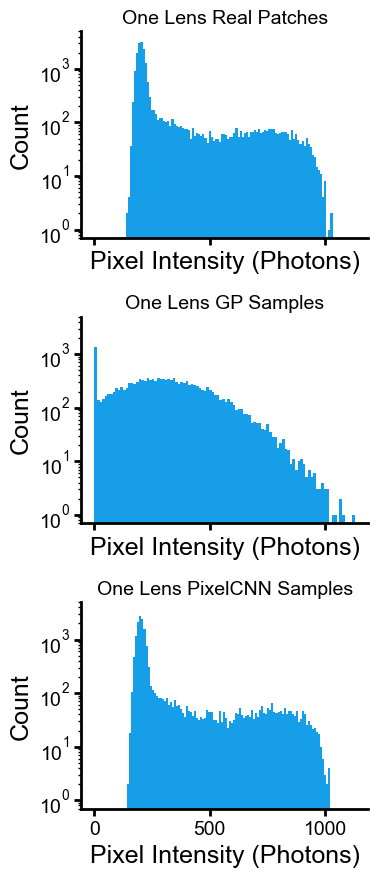

In [4]:
# make three histograms in vertical order 
fig, axes = plt.subplots(3,1, figsize=(4, 9), sharex=True)
out = axes[0].hist(one_real_patches.flatten(), bins=100)
axes[0].set_yscale('log')
axes[0].set_title("One Lens Real Patches")
axes[0].set_ylim(bottom=np.log10(5), top=5e3)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Pixel Intensity (Photons)')
clear_spines(axes[0])

out = axes[1].hist(one_gp_samples.flatten(), bins=100)
axes[1].set_yscale('log')
axes[1].set_title("One Lens GP Samples")
axes[1].set_ylabel('Count')
axes[1].set_ylim(bottom=np.log10(5), top=5e3)
axes[1].set_xlabel('Pixel Intensity (Photons)')
clear_spines(axes[1])

out = axes[2].hist(one_pixelcnn_samples.flatten(), bins=100)
axes[2].set_yscale('log')
axes[2].set_title("One Lens PixelCNN Samples")
axes[2].set_ylabel('Count')
axes[2].set_ylim(bottom=np.log10(5), top=5e3)
axes[2].set_xlabel('Pixel Intensity (Photons)')
clear_spines(axes[2])
# tight layout
plt.tight_layout()

# save figure
plt.savefig('one_lens_histograms.pdf', bbox_inches='tight', transparent=True)

### Examples of model samples

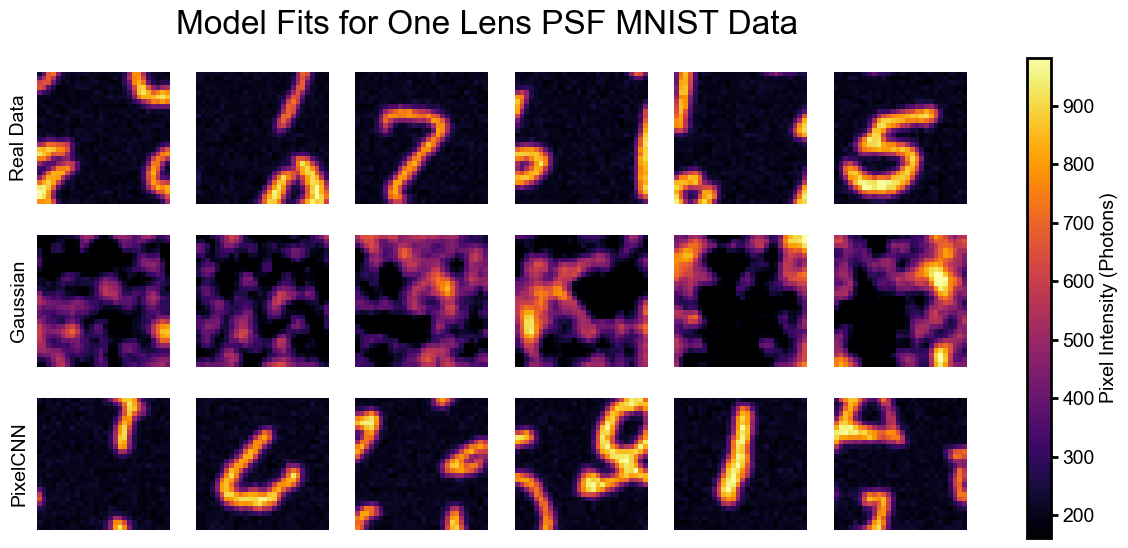

In [5]:
# plot 6 samples
# plot samples
fig, axes = plt.subplots(3, 6, figsize=(2 * 6, 6))

vmin, vmax = np.percentile(one_real_patches, 0.1), np.percentile(one_real_patches, 99.9)

for i, (gp_sample, pixel_cnn_sample) in enumerate(zip(one_gp_samples[:6], one_pixelcnn_samples[:6])):

    im = axes[0, i].imshow(one_real_patches[i], cmap='inferno', vmin=vmin, vmax=vmax, interpolation='nearest')
    axes[1, i].imshow(gp_sample, cmap='inferno', vmin=vmin, vmax=vmax, interpolation='nearest')
    axes[2, i].imshow(pixel_cnn_sample, cmap='inferno', vmin=vmin, vmax=vmax, interpolation='nearest')
    axes[0, i].axis('off')
    axes[1, i].axis('off')
    axes[2, i].axis('off')

# add colorbar
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label('Pixel Intensity (Photons)', fontsize=14)


# add text to the left side of each row
for i, label in enumerate(['Real Data', 'Gaussian', 'PixelCNN']):
    axes[i, 0].text(-0.2, 0.5, label, transform=axes[i, 0].transAxes, va='center', rotation='vertical', fontsize=14)
plt.suptitle("Model Fits for One Lens PSF MNIST Data")
plt.savefig('one_lens_model_fits.pdf', bbox_inches='tight', transparent=True)

Text(0.5, 0.98, 'Comparisons of Models for One Lens MNIST Data')

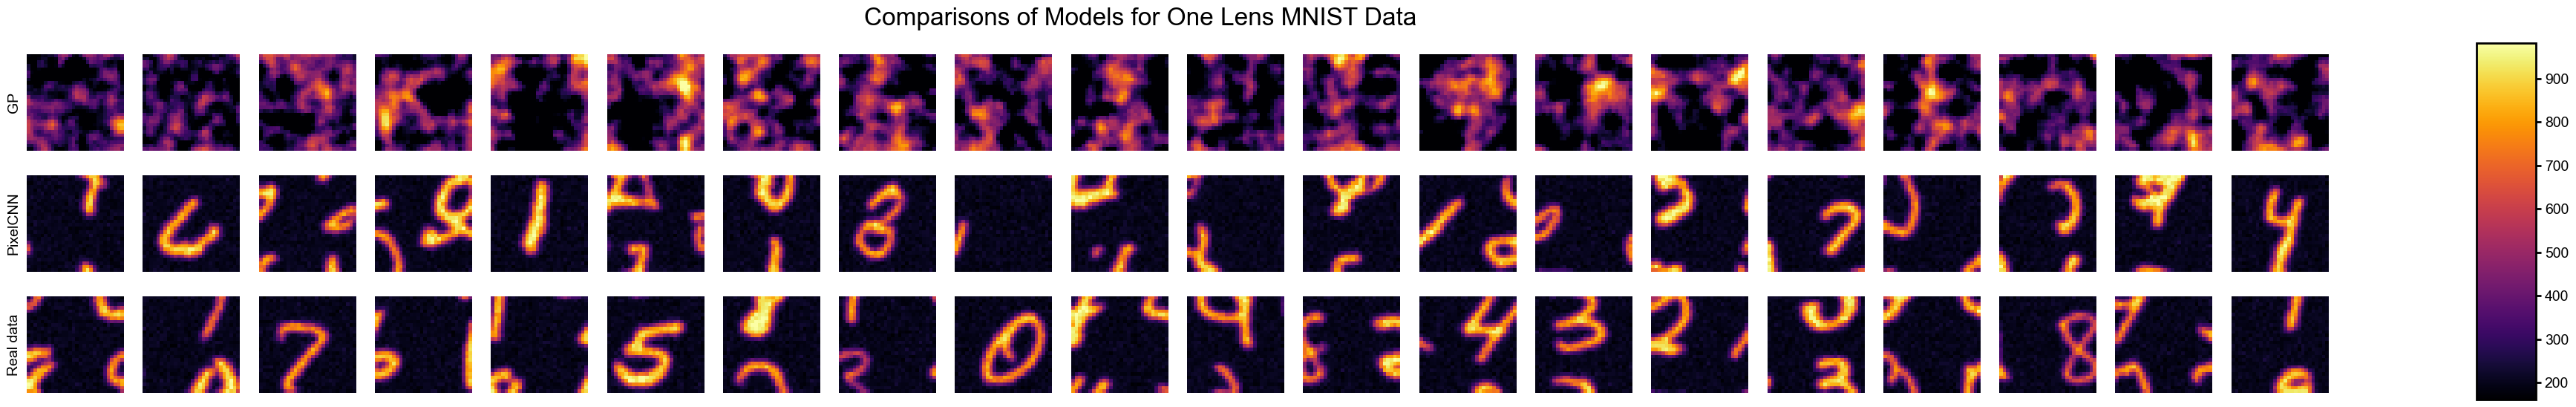

In [6]:
# plot samples, archival
fig, axes = plt.subplots(3, len(one_gp_samples), figsize=(2 * len(one_gp_samples), 6))

vmin, vmax = np.percentile(one_real_patches, 0.1), np.percentile(one_real_patches, 99.9)
# vmin, vmax = np.percentile(gp_samples, 0.5), np.percentile(gp_samples, 99.5)

for i, (gp_sample, pixel_cnn_sample) in enumerate(zip(one_gp_samples, one_pixelcnn_samples)):
    axes[0, i].imshow(gp_sample, cmap='inferno', vmin=vmin, vmax=vmax)
    axes[1, i].imshow(pixel_cnn_sample, cmap='inferno', vmin=vmin, vmax=vmax)
    im = axes[2, i].imshow(one_real_patches[i], cmap='inferno', vmin=vmin, vmax=vmax)
    axes[0, i].axis('off')
    axes[1, i].axis('off')
    axes[2, i].axis('off')

# add colorbar
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])
fig.colorbar(im, cax=cbar_ax)

# add text to the left side of each row
for i, label in enumerate(['GP', 'PixelCNN', 'Real data']):
    axes[i, 0].text(-0.2, 0.5, label, transform=axes[i, 0].transAxes, va='center', rotation='vertical', fontsize=14)
plt.suptitle("Comparisons of Models for One Lens MNIST Data")

# MI Estimate Plots
One Lens PSF sweeping all photon counts

In [7]:
photon_counts = [20, 40, 60, 80, 100, 150, 200, 250, 300]

In [8]:
gaussian_one = []
pixelcnn_one = []

for photon_count in photon_counts: 
    result = np.load(current_path + 'mnist_mi_estimates/gaussian_mi_estimate_{}_photon_count_one_psf.npy'.format(photon_count)) 
    print(result, np.ptp(result), 'gaussian one')
    gaussian_one.append(result)
    result = np.load(current_path + 'mnist_mi_estimates/pixelcnn_mi_estimate_{}_photon_count_one_psf.npy'.format(photon_count))
    print(result, np.ptp(result), 'pixelcnn one')
    pixelcnn_one.append(result)

[1.27683348 1.27796513 1.2806868  1.27942546] 0.0038533192415113326 gaussian one
[0.18866377 0.19396159 0.19651785 0.19414034] 0.007854085535314054 pixelcnn one
[1.77594805 1.77637218 1.77871978 1.77662895] 0.0027717249496079788 gaussian one
[0.23158773 0.23864881 0.24117939 0.23959967] 0.009591666105785879 pixelcnn one
[2.09640079 2.09809644 2.0989526  2.09599744] 0.0029551557843463527 gaussian one
[0.25825845 0.26760619 0.27361793 0.26721114] 0.015359477981697123 pixelcnn one
[2.33426778 2.33580871 2.33691183 2.33443389] 0.002644059261503351 gaussian one
[0.27950584 0.2900115  0.29382528 0.2915982 ] 0.014319438313053545 pixelcnn one
[2.5243546  2.52564809 2.5263731  2.52433084] 0.002042254779523578 gaussian one
[0.32616657 0.30936876 0.31428834 0.30830383] 0.01786273443844505 pixelcnn one
[2.87821272 2.88238571 2.8815846  2.87815578] 0.004229932358390531 gaussian one
[0.34356172 0.44750751 0.34805878 0.34609522] 0.10394578507858432 pixelcnn one
[3.14022404 3.14167389 3.14099309 3.135

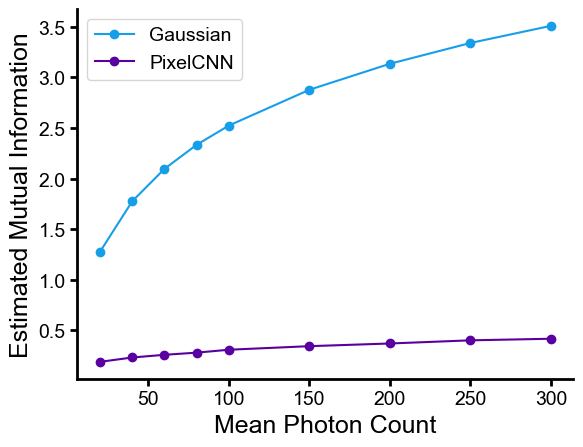

In [9]:
ax = plt.axes()
plt.plot(photon_counts, np.min(gaussian_one, axis=1), label='Gaussian', marker='o')
plt.plot(photon_counts, np.min(pixelcnn_one, axis=1), label='PixelCNN', marker='o')
plt.legend()
plt.xlabel("Mean Photon Count")
plt.ylabel("Estimated Mutual Information")
clear_spines(ax)
plt.savefig('one_lens_mi_vs_photon_count.pdf', transparent=True, bbox_inches='tight')